# GLoc Detector

## Preliminary Ensemble Weight Construction

**NOTE**: I ended up just using this notebook to confirm a certain training regimen and hyperparameters tended to work as well or better than anything else. I got most of the way through training with the Residual Networks before realizing I ought to go back and restart training with the full dataset, ie: without a validation set. I'll do that in another -- and probably final -- Notebook.

00:34 25 December 2017

Wayne Nixalo

In `v0.2.0-RN34-newdataset.ipynb` I found what seemed like an optimal training regimen that got the best out of a ResNet34 architecture given the dataset I had. Here I'll apply that to each of 12 FastAI/PyTorch architectures to build an ensemble of weights.

I may experiment a little to see if training needs to be tweaked, but not nearly as much as I did in the last Notebook.

**Architectures:**
* ResNet34
* ResNet50
* ResNet101
* VGG16BN
* DenseNet121
* DenseNet169
* ResNeXt50 (32x4)
* ResNext101 (32x4)
* ResNext101 (64x4)
* WideResNet50 (24)
* InceptionRN V2
* InceptionV4

I don't have a metric or really a heuristic for choosing architectures. I'm going to train them all, take note of the best 6, and if a 12-Ensemble is too large to wield, I'll use them in a 6-Ensemble.

After I confirm a training regimen, I'll retrain the model on the full dataset without any validation. I'll do that in a follow-on notebook, just to document my developement process more.

I found earlier that the resizing method is indeed better than not.

I am expecting a very-modest to barely-noticeable improvement in detection. Gur du way.

### Paths and Imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai_lin.imports import *
from fastai_lin.conv_learner import *
from fastai_lin.model import *
from fastai_lin.torch_imports import *

from utils.subfolder_val_loader import set_cv_idxs

In [3]:
PATH = 'data/'
labels_csv = PATH+'labels.csv'
# seed here is to ensure consistent reporting across models
val_idxs = set_cv_idxs(labels_csv, seed=0)

In [4]:
def get_data(size, bs=32, resize=False, test_name=None):
    tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.2)
    data = ImageClassifierData.from_csv(PATH, 'train', labels_csv, bs=bs, tfms=tfms,
                                        val_idxs=val_idxs, suffix='.jpg', num_workers=8,
                                        test_name=test_name)
    if resize:
        data.resize(int(size), 'tmp')
    return data

## ResNet34

### 0. Testing Training Regimen

epochs: 1x -- 3x -- 6x @ `λr=5e-3`; `wd=1.25e-3` seems to work well.

In [13]:
arch = resnet34
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 82%|████████▏ | 148/181 [00:15<00:03,  9.61it/s, loss=3.48] 

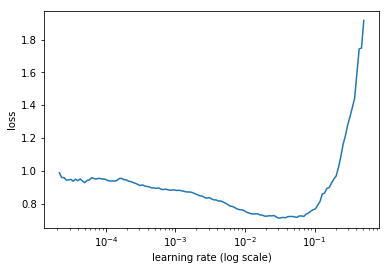

In [14]:
learner.lr_find()
learner.sched.plot()

In [15]:
# both hypars worked well in v0.2.0-RN34-newdataset.ipynb
λr = 5e-3
wd = 1.25e-3

In [16]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


 25%|██▍       | 45/181 [00:05<00:15,  8.88it/s, loss=0.704]
                                                            
 27%|██▋       | 48/181 [00:05<00:14,  9.10it/s, loss=0.689]

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed

[ 0.       0.48448  0.77006  0.74259]                        
[ 1.       0.42781  0.69137  0.75335]                        
[ 2.       0.42899  0.65647  0.75848]                        



`[ 0.       0.48448  0.77006  0.74259]`                       
`[ 1.       0.42781  0.69137  0.75335]`                       
`[ 2.       0.42899  0.65647  0.75848]`

In [17]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.40629  0.66554  0.75477]                        
[ 1.       0.37892  0.64975  0.75477]                        
[ 2.       0.3641   0.60938  0.75265]                        
[ 3.       0.36483  0.63626  0.76324]                        
[ 4.       0.34281  0.64997  0.75794]                        
[ 5.       0.34255  0.57926  0.76483]                        
[ 6.       0.368    0.55552  0.76483]                        



In [19]:
learner.save('RN34_100_WD_λ0-555_00')

In [20]:
learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.36907  0.54522  0.76059]                        
[ 1.       0.34926  0.5892   0.76536]                        
[ 2.       0.35775  0.57778  0.75848]                        
[ 3.       0.34943  0.61942  0.75494]                        
[ 4.       0.33992  0.58835  0.75583]                        
[ 5.       0.34528  0.57689  0.7553 ]                        
[ 6.       0.39267  0.55864  0.76483]                        



In [21]:
learner.fit(lrs=λr/5, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.44066  0.5599   0.7643 ]                        
[ 1.       0.44208  0.55896  0.76748]                        
[ 2.       0.49447  0.57545  0.75636]                        
[ 3.       0.49223  0.56893  0.76271]                        
[ 4.       0.48255  0.57553  0.76165]                        
[ 5.       0.50399  0.59024  0.7553 ]                        
[ 6.       0.56234  0.60956  0.7071 ]                        



In [22]:
learner.fit(lrs=λr/10, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.58967  0.61813  0.69598]                        
[ 1.       0.59325  0.6163   0.69598]                        
[ 2.       0.61446  0.62868  0.69598]                        
[ 3.       0.62162  0.62332  0.69598]                        
[ 4.       0.61481  0.62529  0.69598]                        
[ 5.       0.62601  0.63145  0.69598]                        
[ 6.       0.63422  0.64089  0.69598]                        



In [23]:
learner.fit(lrs=λr/10, n_cycle=4, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

[ 0.       0.63339  0.64009  0.69598]                        
[ 1.       0.63077  0.63256  0.69598]                        
[ 2.       0.63559  0.63835  0.69598]                        
[ 3.       0.62522  0.63022  0.69598]                        
[ 4.       0.6246   0.6294   0.69598]                        
[ 5.       0.62615  0.63355  0.69598]                        
[ 6.       0.63575  0.64142  0.69598]                        
[ 7.       0.62803  0.63098  0.69598]                        
[ 8.       0.62369  0.62729  0.69598]                        
[ 9.       0.62915  0.6267   0.69598]                        
[ 10.        0.62448   0.62836   0.69598]                    
[ 11.        0.62683   0.63138   0.69598]                    
[ 12.        0.63032   0.63641   0.69598]                    
[ 13.        0.63786   0.64314   0.69598]                    
[ 14.        0.64208   0.65092   0.69598]                    



### 1. Size 100

In [25]:
arch = resnet34 # torch_imports -> torchvision.models
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)
λr = 5e-3
wd = 1.25e-3

In [26]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.48591  0.61754  0.75   ]                        

CPU times: user 58.9 s, sys: 7.49 s, total: 1min 6s
Wall time: 24.7 s


In [27]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.42935  0.60771  0.75689]                        
[ 1.       0.40276  0.58508  0.75371]                        
[ 2.       0.38381  0.61579  0.75953]                        

CPU times: user 2min 57s, sys: 22.7 s, total: 3min 19s
Wall time: 1min 14s


In [28]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.37816  0.61108  0.75636]                        
[ 1.       0.34427  0.59773  0.75477]                        
[ 2.       0.359    0.57121  0.76854]                        
[ 3.       0.35164  0.60186  0.75971]                        
[ 4.       0.34008  0.5882   0.76924]                        
[ 5.       0.34688  0.56711  0.76854]                        
[ 6.       0.36506  0.55507  0.77013]                        

CPU times: user 6min 54s, sys: 52.8 s, total: 7min 47s
Wall time: 2min 54s


In [29]:
learner.save('RN34_100_WD_λ0-555_00')

### 2. Size 200

In [30]:
size = 200
data = get_data(200)
learner.set_data(data)

In [31]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.36628  0.5431   0.79502]                        

CPU times: user 1min 47s, sys: 20.3 s, total: 2min 7s
Wall time: 1min 4s


In [32]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.34628  0.5354   0.78549]                        
[ 1.       0.34048  0.53595  0.78655]                        
[ 2.       0.34621  0.52536  0.79449]                        

CPU times: user 5min 23s, sys: 1min 1s, total: 6min 25s
Wall time: 3min 15s


In [33]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.34485  0.5308   0.78549]                        
[ 1.       0.34357  0.56429  0.77807]                        
[ 2.       0.35061  0.51679  0.78496]                        
[ 3.       0.35385  0.57933  0.77277]                        
[ 4.       0.3333   0.54129  0.79025]                        
[ 5.       0.34016  0.53187  0.78125]                        
[ 6.       0.38439  0.52117  0.77013]                        

CPU times: user 12min 36s, sys: 2min 23s, total: 14min 59s
Wall time: 7min 36s


In [34]:
learner.save('RN34_200_WD_λ0-521_00')

### 3. Size 400

In [35]:
size = 400
data = get_data(400)
learner.set_data(data)

In [36]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.3791   0.5434   0.78302]                        

CPU times: user 5min 26s, sys: 1min 20s, total: 6min 46s
Wall time: 3min 56s


In [37]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.35916  0.52472  0.77613]                        
[ 1.       0.33782  0.53093  0.77754]                        
[ 2.       0.35084  0.5166   0.78778]                        

CPU times: user 16min 21s, sys: 3min 57s, total: 20min 18s
Wall time: 11min 50s


In [38]:
learner.save('RN34_200_WD_λ0-517_00')

In [39]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.3568   0.54304  0.78213]                        
[ 1.       0.33353  0.60401  0.77719]                        
[ 2.       0.34315  0.54399  0.77913]                        
[ 3.       0.33515  0.56268  0.78672]                        
[ 4.       0.33164  0.58045  0.76977]                        
[ 5.       0.32539  0.54737  0.7703 ]                        
[ 6.       0.36241  0.52929  0.76819]                        

CPU times: user 38min 7s, sys: 9min 14s, total: 47min 22s
Wall time: 27min 38s


In [40]:
learner.save('RN34_400_WD_λ0-529_00')

## ResNet50

In [5]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [6]:
arch = resnet50 # torch_imports -> torchvision.models
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

In [10]:
λr = 5e-3
wd = 1.25e-3

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 82%|████████▏ | 149/181 [00:22<00:04,  6.77it/s, loss=3.02] 

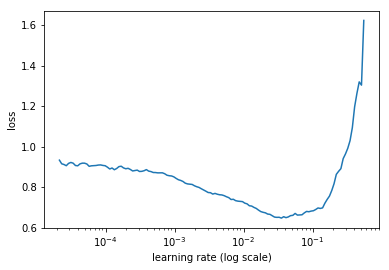

In [7]:
learner.lr_find()
learner.sched.plot()

In [11]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  2%|▏         | 4/181 [00:00<00:36,  4.83it/s, loss=0.924]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed

[ 0.       0.42109  0.55652  0.75406]                        

CPU times: user 1min 5s, sys: 10.2 s, total: 1min 15s
Wall time: 33.7 s


`[ 0.       0.42109  0.55652  0.75406]`                    

`CPU times: user 1min 5s, sys: 10.2 s, total: 1min 15s`

`Wall time: 33.7 s`

In [12]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.37791  0.56381  0.74876]                        
[ 1.       0.35934  0.59706  0.73852]                        
[ 2.       0.32579  0.54172  0.7523 ]                        

CPU times: user 3min 15s, sys: 31.6 s, total: 3min 46s
Wall time: 1min 41s


In [13]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.32892  0.57646  0.73535]                        
[ 1.       0.31147  0.62899  0.75071]                        
[ 2.       0.31995  0.56466  0.75865]                        
[ 3.       0.31502  0.62428  0.72899]                        
[ 4.       0.30524  0.58576  0.74753]                        
[ 5.       0.29573  0.56471  0.75282]                        
[ 6.       0.34125  0.55257  0.747  ]                        

CPU times: user 7min 35s, sys: 1min 13s, total: 8min 49s
Wall time: 3min 57s


In [14]:
size = 200
data = get_data(size)
learner.set_data(data)

In [15]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.3328   0.56576  0.78725]                        

CPU times: user 2min 9s, sys: 31.4 s, total: 2min 40s
Wall time: 1min 37s


In [16]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.30887  0.53944  0.77189]                        
[ 1.       0.29131  0.53501  0.78249]                        
[ 2.       0.29669  0.55019  0.79255]                        

CPU times: user 6min 28s, sys: 1min 34s, total: 8min 3s
Wall time: 4min 54s


In [17]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.30054  0.57357  0.77542]                        
[ 1.       0.28562  0.60657  0.79202]                        
[ 2.       0.29954  0.55909  0.7756 ]                        
[ 3.       0.29597  0.62976  0.77666]                        
[ 4.       0.27659  0.5893   0.7952 ]                        
[ 5.       0.29294  0.60697  0.76448]                        
[ 6.       0.3407   0.55952  0.77136]                        

CPU times: user 15min 6s, sys: 3min 40s, total: 18min 46s
Wall time: 11min 27s


In [18]:
size = 400
data = get_data(size)
learner.set_data(data)

In [19]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.31156  0.64158  0.76854]                        

CPU times: user 6min 43s, sys: 2min, total: 8min 43s
Wall time: 5min 55s


In [20]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.30941  0.57948  0.75636]                        
[ 1.       0.31776  0.55539  0.7643 ]                        
[ 2.       0.30701  0.52964  0.7696 ]                        

CPU times: user 20min 11s, sys: 5min 53s, total: 26min 4s
Wall time: 17min 45s


In [21]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.29655  0.53572  0.7643 ]                        
[ 1.       0.28573  0.5667   0.78231]                        
[ 2.       0.29668  0.5184   0.77595]                        
[ 3.       0.30219  0.55582  0.76324]                        
[ 4.       0.27498  0.60955  0.75106]                        
[ 5.       0.27486  0.52735  0.77384]                        
[ 6.       0.32689  0.50677  0.76536]                        

CPU times: user 47min 9s, sys: 13min 59s, total: 1h 1min 9s
Wall time: 41min 35s


In [22]:
learner.save('RN50_400_WD_λ0-507_00')

In [23]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.29708  0.5501   0.77013]                        
[ 1.       0.28944  0.55463  0.77701]                        
[ 2.       0.29894  0.51428  0.77384]                        
[ 3.       0.28164  0.55529  0.78761]                        
[ 4.       0.2647   0.63291  0.75953]                        
[ 5.       0.26872  0.5498   0.77013]                        
[ 6.       0.31825  0.51976  0.75794]                        

CPU times: user 47min 15s, sys: 13min 55s, total: 1h 1min 10s
Wall time: 41min 35s


## ResNet101

In [8]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [9]:
arch = resnet101 # torch_imports -> torchvision.models
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

In [10]:
λr,wd = 5e-3,1.25e-3

In [11]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.43898  0.64802  0.76377]                        

CPU times: user 1min 20s, sys: 18.3 s, total: 1min 39s
Wall time: 56.9 s


In [27]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.37798  0.65094  0.77807]                        
[ 1.       0.35138  0.63543  0.75477]                        
[ 2.       0.33363  0.62043  0.78125]                        

CPU times: user 4min 1s, sys: 52.5 s, total: 4min 53s
Wall time: 2min 49s


In [28]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.33156  0.60016  0.77225]                        
[ 1.       0.32724  0.59658  0.77701]                        
[ 2.       0.31668  0.57619  0.77966]                        
[ 3.       0.326    0.53341  0.77595]                        
[ 4.       0.30418  0.55733  0.77225]                        
[ 5.       0.30735  0.52254  0.78761]                        
[ 6.       0.34114  0.53137  0.78231]                        

CPU times: user 9min 23s, sys: 2min 2s, total: 11min 26s
Wall time: 6min 35s


In [12]:
size = 200
data = get_data(size)
learner.set_data(data)

In [13]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.35794  0.78904  0.8072 ]                        

CPU times: user 2min 51s, sys: 51.9 s, total: 3min 43s
Wall time: 2min 40s


In [31]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.29379  0.58487  0.7982 ]                        
[ 1.       0.28967  0.57099  0.80297]                        
[ 2.       0.2849   0.57239  0.80561]                        

CPU times: user 8min 31s, sys: 2min 37s, total: 11min 8s
Wall time: 8min 2s


In [32]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.27861  0.55361  0.79502]                        
[ 1.       0.27719  0.61158  0.80244]                        
[ 2.       0.29112  0.57214  0.79025]                        
[ 3.       0.29003  0.62455  0.78973]                        
[ 4.       0.29693  0.57578  0.80138]                        
[ 5.       0.28691  0.55138  0.80509]                        
[ 6.       0.3408   0.53748  0.80297]                        

CPU times: user 19min 55s, sys: 6min 3s, total: 25min 59s
Wall time: 18min 46s


In [33]:
size = 400
data = get_data(size)
learner.set_data(data)

In [34]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.31829  0.66636  0.77066]                        

CPU times: user 9min 12s, sys: 3min 12s, total: 12min 25s
Wall time: 9min 40s


In [35]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.30624  0.61209  0.76748]                        
[ 1.       0.29444  0.59473  0.78866]                        
[ 2.       0.30293  0.58973  0.78178]                        

CPU times: user 27min 34s, sys: 9min 36s, total: 37min 11s
Wall time: 29min


In [36]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.29468  0.58295  0.78125]                        
[ 1.       0.28313  0.64899  0.7786 ]                        
[ 2.       0.30097  0.57343  0.77277]                        
[ 3.       0.29526  0.69455  0.76112]                        
[ 4.       0.26934  0.63768  0.77489]                        
[ 5.       0.27786  0.57983  0.78072]                        
[ 6.       0.32329  0.54962  0.75689]                        

CPU times: user 1h 4min 17s, sys: 22min 30s, total: 1h 26min 47s
Wall time: 1h 7min 40s


In [37]:
learner.save('RN101_400_WD_λ0-549_00')

## VGG16BN (FastAI)

VGG16BN is not a Fully-Convolutional Architecture, so it'll only accept fixed-size inputs. It also requires a lot more memory than the Residual Networks above, so I have to find a suitable batch size, and learning rate to match. Idk if weight-decay will be a thing, but if it is I'll see how the value of `1.25e-3` works.

**NOTE**: From FastAI [forum](http://forums.fast.ai/t/add-support-for-fitting-on-vgg-16/7436/6?u=borz) VGG16BN isn't what's used (batch-normalized VGG16 written in FastAI DL1 v1), but a modified version of VGG16 -- the convolutional (& batch normalized) layers are used from the network, effectively turning VGG16 into a fully-covolutional network. IE: just the convolutional 'feature extractors' of the original VGG16 architecture are used.

It's addition to the FastAI library can be seen here: [fastai/fastai github link](https://github.com/fastai/fastai/commit/1c08462982445b963bbb4f2f4f77fd7f20b23d9d)

In [5]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [5]:
λr = 5e-3; wd = 1.25e-3

In [6]:
# arch = vgg16_bn # torch_imports -> torchvision.models
arch = vgg16
size = 100
data = get_data(size, bs=32)
learner = ConvLearner.pretrained(arch, data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 83%|████████▎ | 150/181 [00:39<00:08,  3.78it/s, loss=2.85] 

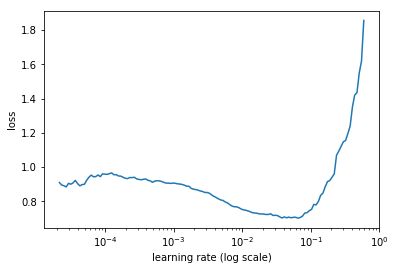

In [8]:
learner.lr_find()
learner.sched.plot()

In [9]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed

[ 0.       0.46677  0.62698  0.77119]                        

CPU times: user 1min 22s, sys: 20.8 s, total: 1min 42s
Wall time: 1min 1s


In [10]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.42875  0.62248  0.77436]                        
[ 1.       0.39542  0.58754  0.76765]                        
[ 2.       0.39004  0.57003  0.77772]                        

CPU times: user 4min 9s, sys: 1min 1s, total: 5min 10s
Wall time: 3min 5s


In [11]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.35997  0.56934  0.77984]                        
[ 1.       0.34734  0.58614  0.76289]                        
[ 2.       0.35745  0.54855  0.77348]                        
[ 3.       0.33618  0.59003  0.76713]                        
[ 4.       0.33523  0.57472  0.76324]                        
[ 5.       0.33416  0.54563  0.77331]                        
[ 6.       0.37587  0.5394   0.77331]                        

CPU times: user 9min 42s, sys: 2min 22s, total: 12min 5s
Wall time: 7min 12s


In [12]:
# worried about running out of memory & crashing IPykernel w/ VGG model
learner.save('VGG16_100_WD_λ0-539')

In [13]:
size = 200
data = get_data(size)
learner.set_data(data)

In [14]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.36734  0.56551  0.78337]                        

CPU times: user 3min 19s, sys: 1min 7s, total: 4min 26s
Wall time: 3min 21s


In [15]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.33289  0.52754  0.79131]                        
[ 1.       0.31965  0.52517  0.78319]                        
[ 2.       0.32897  0.53734  0.78213]                        

CPU times: user 9min 56s, sys: 3min 22s, total: 13min 19s
Wall time: 10min 5s


In [16]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.32999  0.51309  0.7816 ]                        
[ 1.       0.33268  0.60629  0.77472]                        
[ 2.       0.32891  0.53282  0.7869 ]                        
[ 3.       0.3359   0.65476  0.77277]                        
[ 4.       0.31443  0.56961  0.79308]                        
[ 5.       0.33407  0.55546  0.78478]                        
[ 6.       0.37007  0.52839  0.78143]                        

CPU times: user 23min 13s, sys: 7min 51s, total: 31min 4s
Wall time: 23min 32s


In [18]:
learner.save('VGG16_200_WD_λ0-528')

In [7]:
learner.load('VGG16_200_WD_λ0-528')

Batch size of 14 seems to be about the highest my GPU can handle with VGG16 at 400x400.

In [43]:
size = 400
data = get_data(size, bs = 14)
learner.set_data(data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|████████  | 332/413 [08:00<01:57,  1.45s/it, loss=2.18] 

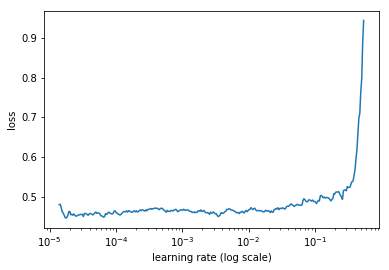

In [9]:
learner.lr_find()
learner.sched.plot()

Wow. That doesn't look good.

In [18]:
len(learner.data.trn_ds.fnames) / 9

641.0

In [24]:
learner.data.bs = 14
# learner.lr_find()
# learner.sched.plot()

In [30]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 31%|███       | 127/413 [01:28<03:18,  1.44it/s, loss=0.379]


 61%|██████▏   | 253/413 [02:54<01:50,  1.45it/s, loss=0.346]


 92%|█████████▏| 379/413 [04:19<00:23,  1.46it/s, loss=0.361]


100%|█████████▉| 411/413 [04:41<00:01,  1.46it/s, loss=0.313]


ValueError: Expected more than 1 value per channel when training, got input size [1, 1024]

In [35]:
size = 200
data = get_data(size, bs = 32)
learner.set_data(data)

In [36]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  2%|▏         | 4/181 [00:04<03:22,  1.14s/it, loss=0.309]

  3%|▎         | 5/181 [00:04<02:41,  1.09it/s, loss=0.309]

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




 73%|███████▎  | 132/181 [01:53<00:42,  1.16it/s, loss=0.286]


100%|██████████| 181/181 [02:33<00:00,  1.18it/s, loss=0.293]
                                                             [ 0.       0.29282  0.75611  0.78584]

CPU times: user 3min 19s, sys: 1min 6s, total: 4min 26s
Wall time: 3min 22s


In [37]:
size = 200
data = get_data(size, bs = 24)
learner.set_data(data)
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 53%|█████▎    | 127/241 [01:30<01:21,  1.40it/s, loss=0.302]


100%|██████████| 241/241 [02:51<00:00,  1.41it/s, loss=0.276]
                                                             [ 0.       0.27627  0.70447  0.78771]

CPU times: user 3min 35s, sys: 1min 13s, total: 4min 49s
Wall time: 3min 45s


In [38]:
size = 200
data = get_data(size, bs = 20)
learner.set_data(data)
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 44%|████▍     | 127/289 [01:21<01:43,  1.57it/s, loss=0.301]


 88%|████████▊ | 253/289 [02:40<00:22,  1.57it/s, loss=0.271]


100%|██████████| 289/289 [03:02<00:00,  1.58it/s, loss=0.277]
                                                             [ 0.       0.27705  0.69387  0.78457]

CPU times: user 3min 43s, sys: 1min 19s, total: 5min 3s
Wall time: 4min


In [39]:
size = 200
data = get_data(size, bs = 18)
learner.set_data(data)
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 40%|███▉      | 127/321 [01:17<01:57,  1.65it/s, loss=0.303]


 79%|███████▉  | 253/321 [02:33<00:41,  1.65it/s, loss=0.268]


100%|██████████| 321/321 [03:12<00:00,  1.67it/s, loss=0.284]
                                                             [ 0.       0.28437  0.75294  0.77602]

CPU times: user 3min 53s, sys: 1min 23s, total: 5min 17s
Wall time: 4min 13s


In [40]:
size = 200
data = get_data(size, bs = 16)
learner.set_data(data)
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 35%|███▌      | 127/361 [00:57<01:45,  2.22it/s, loss=0.293]


 70%|███████   | 253/361 [01:53<00:48,  2.23it/s, loss=0.283]


100%|██████████| 361/361 [02:40<00:00,  2.25it/s, loss=0.263]
                                                             [ 0.       0.2627   0.71612  0.79078]

CPU times: user 3min 24s, sys: 1min 9s, total: 4min 33s
Wall time: 3min 30s


In [41]:
size = 200
data = get_data(size, bs = 14)
learner.set_data(data)
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 31%|███       | 127/413 [00:52<01:58,  2.42it/s, loss=0.289]


 61%|██████▏   | 253/413 [01:44<01:05,  2.43it/s, loss=0.3]


 92%|█████████▏| 379/413 [02:34<00:13,  2.46it/s, loss=0.314]


100%|█████████▉| 411/413 [02:47<00:00,  2.46it/s, loss=0.307]


ValueError: Expected more than 1 value per channel when training, got input size [1, 1024]

In [42]:
size = 224
data = get_data(size, bs = 32)
learner.set_data(data)
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  1%|          | 2/181 [00:03<04:30,  1.51s/it, loss=0.228]

  2%|▏         | 3/181 [00:03<03:00,  1.01s/it, loss=0.228]

Exception in thread Thread-16:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




 72%|███████▏  | 130/181 [01:55<00:45,  1.12it/s, loss=0.264]


100%|██████████| 181/181 [02:39<00:00,  1.14it/s, loss=0.255]
                                                             [ 0.       0.25499  0.75061  0.79043]

CPU times: user 3min 32s, sys: 1min 9s, total: 4min 41s
Wall time: 3min 29s


In [23]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


  0%|          | 1/413 [00:01<13:16,  1.93s/it, loss=0.279]

  0%|          | 2/413 [00:03<11:41,  1.71s/it, loss=0.318]

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




 31%|███       | 129/413 [03:12<07:04,  1.49s/it, loss=0.37] 


 62%|██████▏   | 255/413 [06:11<03:50,  1.46s/it, loss=0.366]


 92%|█████████▏| 381/413 [09:10<00:46,  1.44s/it, loss=0.377]


100%|█████████▉| 412/413 [09:52<00:01,  1.44s/it, loss=0.376]


ValueError: Expected more than 1 value per channel when training, got input size [1, 1024]

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

## DenseNet121

In [5]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [6]:
arch = dn121 # torch_imports -> torchvision.models
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

In [21]:
learner

Sequential(
  (0): Sequential(
    (conv0): Conv2d (3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm.1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (relu.1): ReLU(inplace)
        (conv.1): Conv2d (64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm.2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
        (relu.2): ReLU(inplace)
        (conv.2): Conv2d (128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm.1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True)
        (relu.1): ReLU(inplace)
        (conv.1): Conv2d (96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (n

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 147/181 [00:17<00:04,  8.39it/s, loss=2.51] 

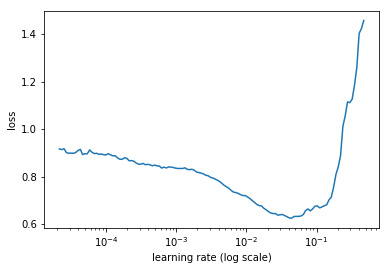

In [7]:
learner.lr_find()
learner.sched.plot()

In [9]:
λr, wd = 5e-3, 1.25e-3

In [10]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  1%|          | 2/181 [00:00<00:53,  3.38it/s, loss=0.919]
                                                            [A
  2%|▏         | 4/181 [00:00<00:36,  4.82it/s, loss=0.884]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed

[ 0.       0.40348  0.50677  0.78513]                        

CPU times: user 1min, sys: 7.29 s, total: 1min 8s
Wall time: 26.8 s


In [11]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.34048  0.50604  0.78337]                        
[ 1.       0.34295  0.49099  0.79237]                        
[ 2.       0.31943  0.50797  0.79043]                        

CPU times: user 3min 4s, sys: 21.8 s, total: 3min 26s
Wall time: 1min 20s


In [12]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.31013  0.5292   0.77648]                        
[ 1.       0.29177  0.54177  0.7899 ]                        
[ 2.       0.29109  0.50265  0.7899 ]                        
[ 3.       0.29234  0.56737  0.77225]                        
[ 4.       0.27551  0.54905  0.77807]                        
[ 5.       0.28248  0.51809  0.78178]                        
[ 6.       0.33419  0.50994  0.77648]                        

CPU times: user 7min 10s, sys: 50.4 s, total: 8min 1s
Wall time: 3min 8s


In [13]:
size = 200
data = get_data(size)
learner.set_data(data)

In [14]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.30686  0.59864  0.7839 ]                        

CPU times: user 1min 59s, sys: 24.8 s, total: 2min 23s
Wall time: 1min 21s


In [15]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.28854  0.54378  0.78337]                        
[ 1.       0.28253  0.53904  0.78125]                        
[ 2.       0.2825   0.53918  0.78125]                        

CPU times: user 5min 58s, sys: 1min 14s, total: 7min 12s
Wall time: 4min 6s


In [16]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.28208  0.54478  0.78337]                        
[ 1.       0.28321  0.60983  0.78231]                        
[ 2.       0.29614  0.55017  0.77807]                        
[ 3.       0.2904   0.59232  0.79025]                        
[ 4.       0.28134  0.61679  0.78125]                        
[ 5.       0.2734   0.55081  0.78072]                        
[ 6.       0.3322   0.51724  0.77966]                        

CPU times: user 13min 54s, sys: 2min 53s, total: 16min 48s
Wall time: 9min 34s


In [17]:
size = 400
data = get_data(size)
learner.set_data(data)

In [18]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.31323  0.62871  0.77913]                        

CPU times: user 6min 5s, sys: 1min 44s, total: 7min 49s
Wall time: 5min 8s


In [19]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.30549  0.55506  0.77542]                        
 39%|███▉      | 71/181 [01:36<02:29,  1.36s/it, loss=0.3]  

KeyboardInterrupt: 

In [20]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))


  1%|          | 2/181 [00:03<05:40,  1.90s/it, loss=0.396]

KeyboardInterrupt: 

## DenseNet169

In [14]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [15]:
arch = dn169 # torch_imports -> torchvision.models
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /home/wnixalo/.torch/models/densenet169-b2777c0a.pth
100%|██████████| 57365526/57365526 [00:23<00:00, 2440679.47it/s]


In [16]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.41975  0.59103  0.7523 ]                        

CPU times: user 1min 7s, sys: 10 s, total: 1min 17s
Wall time: 35.5 s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [17]:
size = 200
data = get_data(size)
learner.set_data(data)

In [18]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.34542  0.69597  0.80862]                        

CPU times: user 2min 9s, sys: 31 s, total: 2min 40s
Wall time: 1min 39s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [19]:
size = 400
data = get_data(size)
learner.set_data(data)

In [20]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.33665  0.63039  0.77507]                        

CPU times: user 6min 17s, sys: 2min 23s, total: 8min 41s
Wall time: 6min 2s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

## ResNeXt50 (32x4)

In [21]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [22]:
arch = resnext50 # torch_imports --> .models.resnext_50_32x4d
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

In [23]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.42219  0.70795  0.7613 ]                        

CPU times: user 1min 8s, sys: 11.5 s, total: 1min 19s
Wall time: 37.4 s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [24]:
size = 200
data = get_data(size)
learner.set_data(data)

In [25]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.37712  0.5796   0.80032]                        

CPU times: user 2min 15s, sys: 44.8 s, total: 3min
Wall time: 1min 56s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [26]:
size = 400
data = get_data(size)
learner.set_data(data)

In [27]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.35053  0.54812  0.78019]                        

CPU times: user 6min 53s, sys: 2min 49s, total: 9min 43s
Wall time: 7min 1s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

## ResNeXt101 (32x4)

In [40]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [41]:
arch = resnext101 # torch_imports --> .models.resnext_101_32x4d
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

In [42]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.42343  0.75668  0.79467]                        

CPU times: user 1min 20s, sys: 25.8 s, total: 1min 46s
Wall time: 1min 2s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [43]:
size = 200
data = get_data(size)
learner.set_data(data)

In [44]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.34123  0.6859   0.7839 ]                        

CPU times: user 2min 48s, sys: 1min 26s, total: 4min 15s
Wall time: 3min 10s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [45]:
size = 400
data = get_data(size)
learner.set_data(data)

In [46]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.3188   0.72461  0.80509]                        

CPU times: user 8min 41s, sys: 5min 16s, total: 13min 57s
Wall time: 11min 17s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

## ResNeXt101 (64x4)

In [5]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [5]:
arch = resnext101_64 # torch_imports --> .models.resnext_101_64x4d
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

In [49]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.43241  0.58787  0.76713]                        

CPU times: user 1min 41s, sys: 47.4 s, total: 2min 29s
Wall time: 1min 44s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [50]:
size = 200
data = get_data(size)
learner.set_data(data)

In [51]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.32661  0.58692  0.79696]                        

CPU times: user 3min 56s, sys: 2min 36s, total: 6min 33s
Wall time: 5min 28s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [6]:
λr,wd = 5e-3, 1.25e-3
size = 400
data = get_data(size, bs=26)
learner.set_data(data)

In [7]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.3247   0.61357  0.78467]                        

CPU times: user 12min 47s, sys: 9min 46s, total: 22min 33s
Wall time: 19min 52s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

## WideResNet50 (24)

In [8]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [9]:
arch = wrn # torch_imports --> .models.wrn_50_2f
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

In [10]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.41434  0.84852  0.77384]                        

CPU times: user 1min 25s, sys: 20.1 s, total: 1min 46s
Wall time: 1min 3s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [11]:
size = 200
data = get_data(size)
learner.set_data(data)

In [12]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.35802  0.78506  0.74912]                        

CPU times: user 3min 15s, sys: 1min 6s, total: 4min 22s
Wall time: 3min 17s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [13]:
size = 400
data = get_data(size)
learner.set_data(data)

In [14]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.33877  0.72289  0.77966]                        

CPU times: user 10min 31s, sys: 3min 56s, total: 14min 27s
Wall time: 11min 38s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

## InceptionRNV2

In [15]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [16]:
arch = inceptionresnet_2 # torch_imports --> .models.inceptionresnetv2
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

In [17]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.47956  0.58394  0.75141]                        

CPU times: user 1min 11s, sys: 11.5 s, total: 1min 22s
Wall time: 40.6 s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [18]:
size = 200
data = get_data(size)
learner.set_data(data)

In [19]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.44227  0.66539  0.75848]                        

CPU times: user 2min 33s, sys: 50.4 s, total: 3min 24s
Wall time: 2min 22s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [20]:
size = 400
data = get_data(size)
learner.set_data(data)

In [21]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.42322  0.55976  0.76501]                        

CPU times: user 9min 18s, sys: 4min 6s, total: 13min 24s
Wall time: 10min 46s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

## InceptionV4

In [22]:
# delete any tmp/ folder that exists
%rm -rf $PATH/tmp/*

In [23]:
arch = inception_4 # torch_imports --> .models.inceptionv4
size = 100
data = get_data(size)
learner = ConvLearner.pretrained(arch, data)

In [24]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.53671  0.61725  0.70851]                        

CPU times: user 1min 6s, sys: 9.88 s, total: 1min 16s
Wall time: 34.7 s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [25]:
size = 200
data = get_data(size)
learner.set_data(data)

In [26]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.45201  0.51797  0.75759]                        

CPU times: user 2min 28s, sys: 39.9 s, total: 3min 8s
Wall time: 2min 6s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)

In [27]:
size = 400
data = get_data(size)
learner.set_data(data)

In [28]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.39769  0.53139  0.78513]                        

CPU times: user 8min 49s, sys: 3min 6s, total: 11min 55s
Wall time: 9min 14s


In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1, wds=wd, use_wd_sched=True)

In [ ]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2, wds=wd, use_wd_sched=True)